# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep = ';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).

azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,886367.000000,886367.000000,886367.000000,886367.000000,886367.000000,886367.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,817722.000000,817722.000000,891221.000000,891221.000000,817722.000000,817722.000000,817722.000000,872873.000000,306609.000000,783619.000000,817722.000000,798073.000000,794213.000000,798073.000000,817252.000000,798073.000000,798073.000000,757897.000000,757897.000000,757897.000000,757897.000000,757897.000000,757897.000000,797481.000000,797481.000000,797481.000000,798066.000000,770025.000000,757897.000000,886367.000000,770025.000000,785421.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,3.790586,1101.178533,7.350304,0.196612,1.792102,14.622637,4.453621,3.599574,2.185966,4.791151,2.432575,1.026827,8.154346,3.419630,3.945860,4.272729,4.240609,4.001597,4.023709,4.359086,4.481405,4.025014,3.910139,4.763223,4.667550,4.445007,4.256076,3.661784,1.266967,0.008423,0.003483,1.197852,3.362438,10.864126,1.727637,0.004162,4.207243,3.410640,3.933406,7.908791,8.287263,0.040647,2.798641,3.018452,1993.277011,4.052836,1.494277,1.265584,0.624525,0.305927,1.389552,3.158580,4.153043,3.939172,4.549491,3.738306,2.592991,2.963540,2.698691,4.257967,619.701439,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,1.987876,976.583551,3.525723,0.397437,1.269062,12.616883,3.855639,3.926486,1.756537,3.425305,1.474315,0.586634,4.844532,1.417741,1.946564,1.915885,2.007373,1.857540,2.077746,2.022829,1.807552,1.903816,1.580306,1.830789,1.795712,1.852412,1.770137,1.707637,1.287435,0.091392,0.084957,0.952532,1.352704,7.639683,1.155849,0.068855,1.624057,1.628844,1.964701,1.923137,15.628087,0.324028,2.656713,1.550312,3.332739,1.949539,1.403961,1.245178,1.013443,0.638725,1.779483,1.329537,2.183710,1.718996,2.028919,0.923193,1.119052,1.428882,1.521524,2.030385,340.034318,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

In [4]:
azdias.head(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,4,0,10.0,0,-1,15.0,4.0,2.0,2.0,1.0,1.0,0,0,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,-1,NaN,NaN,-1,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,1,1996,10.0,0,3,21.0,6.0,5.0,3.0,2.0,1.0,1,14,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3,1.0,0.0,2,5,0.0,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,1,1979,10.0,1,3,3.0,1.0,1.0,1.0,3.0,2.0,1,15,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2,0.0,0.0,1,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,0.0,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,6,1957,1.0,0,2,0.0,0.0,0.0,0.0,9.0,4.0,1,8,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1,0.0,0.0,1,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,0.0,4.0,1.0,0.0,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,5,1963,5.0,0,3,32.0,10.0,10.0,5.0,3.0,2.0,1,8,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2,0.0,0.0,2,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,0.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3,1,2,2.0,3,1,5,2,2,5,2,1943,1.0,0,3,8.0,2.0,1.0,1.0,4.0,2.0,1,3,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0,0.0,0.0,2,4,10.0,1.0,0.0,5.0,3.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,0.0,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,-1,2,2,5.0,1,5,1,5,4,3,4,0,12.0,0,2,2.0,1.0,1.0,1.0,2.0,1.0,1,10,4.0,2,5,5,7,2,6,5,5,7,7,4,7,7,7,1,0.0,0.0,1,4,0.0,1.0,0.0,6.0,NaN,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,W,5.0,4,4A,22,3.0,2.0,0.0,0.0,1.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,-1,1,1,3.0,3,3,4,1,3,2,5,1964,9.0,0,1,5.0,2.0,1.0,1.0,1.0,1.0,1,8,5.0,7,7,7,5,6,2,2,7,5,1,1,2,5,5,0,0.0,0.0,1,1,14.0,1.0,0.0,4.0,NaN,5.0,9.0,6.0,0.0,8.0,3.0,1992.0,W,1.0,2,2D,14,2.0,2.0,0.0,0.0,0.0,4.0,2.0,5.0,3.0,4.0,1.0,4.0,1.0,1.0,758.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,-1,3,1,3.0,4,4,2,4,2,2,6,1974,3.0,1,3,10.0,3.0,1.0,1.0,10.0,5.0,1,11,4.0,4,5,4,1,5,6,4,5,2,5,5,3,1,4,3,0.0,0.0,2,6,16.0,1.0,0.0,3.0,NaN,5.0,8.0,2.0,1.0,3.0,4.0,1992.0,W,1.0,1,1A,13,1.0,1.0,0.0,0.0,0.0,5.0,3.0,4.0,4.0,4.0,1.0,3.0,2.0,3.0,511.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,-1,3,2,4.0,2,4,2,3,5,4,1,1975,12.0,1,2,4.0,1.0,1.0,1.0,3.0,2.0,1,15,4.0,2,1,1,3,2,6,6,3,4,7,6,7,1,3,3,0.0,0.0,2,4,17.0,1.0,0.0,4.0,6.0,4.0,3.0,9.0,0.0,3.0,4.0,1992.0,W,7.0,1,1E,15,1.0,3.0,1.0,0.0,0.0,2.0,6.0,5.0,4.0,3.0,1.0,3.0,3.0,1.0,530.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,3.0,1.0


In [5]:
azdias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [6]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,ANZ_HAUSHALTE_AKTIV,person,ordinal,[-1]
freq,1,43,49,26


In [7]:
feat_info.head(85)

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [8]:
feat_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


In [9]:
# Added a col to keep track of droed col
feat_info['Dropped']='no'


The data has mainly been encoded and looking at the Data_Dictionary.md most of the floats can be converted to Ints to save on memory.
Many values are also null and will need to be treated before applying the differnt ML algorithims


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [10]:
# Identify missing or unknown data values and convert them to NaNs.

# Initial number of missing values in each col before converting missing codes
missing_values_0 = azdias.isnull().sum()
print('Initial total number of missing values {}'.format(missing_values_0.sum()))
print('Initial percentage of missing values {}'.format(azdias.isnull().mean()*100))

Initial total number of missing values 4896838
Initial percentage of missing values AGER_TYP                  0.000000
ALTERSKATEGORIE_GROB      0.000000
ANREDE_KZ                 0.000000
CJT_GESAMTTYP             0.544646
FINANZ_MINIMALIST         0.000000
FINANZ_SPARER             0.000000
FINANZ_VORSORGER          0.000000
FINANZ_ANLEGER            0.000000
FINANZ_UNAUFFAELLIGER     0.000000
FINANZ_HAUSBAUER          0.000000
FINANZTYP                 0.000000
GEBURTSJAHR               0.000000
GFK_URLAUBERTYP           0.544646
GREEN_AVANTGARDE          0.000000
HEALTH_TYP                0.000000
LP_LEBENSPHASE_FEIN       0.544646
LP_LEBENSPHASE_GROB       0.544646
LP_FAMILIE_FEIN           0.544646
LP_FAMILIE_GROB           0.544646
LP_STATUS_FEIN            0.544646
LP_STATUS_GROB            0.544646
NATIONALITAET_KZ          0.000000
PRAEGENDE_JUGENDJAHRE     0.000000
RETOURTYP_BK_S            0.544646
SEMIO_SOZ                 0.000000
SEMIO_FAM                 0.000000
SEMIO_

In [11]:
# convert missing value codes to NaN


def convert_missing_codes(df, feat_file):
    '''
    Goes through the dataframe column by column and converts all the values
    in the feat_file to NaN.
    ARGS:
        df (dataframe) - dataframe which contains values to convert to NaN.
        feat_file (dataframe) - dataframe with information about each feature.
    RETURNS:
        df_copy (dataframe) - dataframe with values corresponding to missing value codes converted to NaN.
    '''

   # missing_dict = create_missing_dict(feat_file)
    #values = valid_values(df, missing_dict)

    cnt = 0
    df_copy = df.copy()
    
    for rw in feat_info['attribute']:
   
        rep=feat_file.iloc[cnt,3].strip('[]').split(',')
        # Is there a better way to do this

        for i in range(0, len(rep)): 
            if (rep[i]!='X' and rep[i]!='XX' and rep[i]!=''):
                #print(rep[i],i)
                rep[i] = int(rep[i]) 
            
            
        # this works only if num could be converted            
        #rep = list(map(int, rep))    
        
        #print(rep,type(rep),rep2)
        df_copy[rw] = df_copy[rw].replace(rep, np.nan)
        #print(cnt,rep,type(rep),rw,rep2,type(rep2))
        cnt += 1
    

    return df_copy



azdias_parsed = convert_missing_codes(azdias, feat_info)

In [12]:
azdias_parsed.head(10)

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_DEUG_2015,CAMEO_DEU_2015,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1,2.0,3,4,3,5,5,3,4,NaN,10.0,0,NaN,15.0,4.0,2.0,2.0,1.0,1.0,NaN,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2,5.0,1,5,2,5,4,5,1,1996.0,10.0,0,3.0,21.0,6.0,5.0,3.0,2.0,1.0,1.0,14.0,1.0,5,4,4,3,1,2,2,3,6,4,7,4,7,6,3.0,1.0,NaN,2.0,5,NaN,2.0,0.0,6.0,NaN,3.0,9.0,11.0,0.0,8.0,1.0,1992.0,W,4.0,8,8A,51,0.0,0.0,0.0,2.0,5.0,1.0,6.0,3.0,8.0,3.0,2.0,1.0,3.0,3.0,963.0,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2,3.0,1,4,1,2,3,5,1,1979.0,10.0,1,3.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,3.0,4,1,3,3,4,4,6,3,4,7,7,7,3,3,2.0,0.0,NaN,1.0,5,17.0,1.0,0.0,4.0,NaN,3.0,9.0,10.0,0.0,1.0,5.0,1992.0,W,2.0,4,4C,24,1.0,3.0,1.0,0.0,NaN,3.0,2.0,4.0,4.0,4.0,2.0,3.0,2.0,2.0,712.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2,2.0,4,2,5,2,1,2,6,1957.0,1.0,0,2.0,NaN,NaN,NaN,NaN,9.0,4.0,1.0,8.0,2.0,5,1,2,1,4,4,7,4,3,4,4,5,4,4,1.0,0.0,NaN,1.0,3,13.0,0.0,0.0,1.0,NaN,NaN,9.0,1.0,0.0,1.0,4.0,1997.0,W,7.0,2,2A,12,4.0,1.0,0.0,0.0,1.0,4.0,4.0,2.0,6.0,4.0,NaN,4.0,1.0,NaN,596.0,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1,5.0,4,3,4,1,3,2,5,1963.0,5.0,0,3.0,32.0,10.0,10.0,5.0,3.0,2.0,1.0,8.0,5.0,6,4,4,2,7,4,4,6,2,3,2,2,4,2,2.0,0.0,NaN,2.0,4,20.0,4.0,0.0,5.0,1.0,2.0,9.0,3.0,0.0,1.0,4.0,1992.0,W,3.0,6,6B,43,1.0,4.0,1.0,0.0,NaN,3.0,2.0,5.0,1.0,5.0,3.0,3.0,5.0,5.0,435.0,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,3.0,1.0,2,2.0,3,1,5,2,2,5,2,1943.0,1.0,0,3.0,8.0,2.0,1.0,1.0,4.0,2.0,1.0,3.0,3.0,2,4,7,4,2,2,2,5,7,4,4,4,7,6,0.0,0.0,NaN,2.0,4,10.0,1.0,0.0,5.0,3.0,6.0,9.0,5.0,0.0,1.0,5.0,1992.0,W,7.0,8,8C,54,2.0,2.0,0.0,0.0,NaN,4.0,6.0,2.0,7.0,4.0,4.0,4.0,1.0,5.0,1300.0,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0
6,NaN,2.0,2,5.0,1,5,1,5,4,3,4,NaN,12.0,0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,10.0,4.0,2,5,5,7,2,6,5,5,7,7,4,7,7,7,1.0,0.0,NaN,1.0,4,NaN,1.0,0.0,6.0,NaN,3.0,9.0,4.0,0.0,1.0,5.0,1992.0,W,5.0,4,4A,22,3.0,2.0,0.0,0.0,1.0,3.0,6.0,4.0,3.0,5.0,3.0,5.0,2.0,5.0,867.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,4.0,6.0,3.0
7,NaN,1.0,1,3.0,3,3,4,1,3,2,5,1964.0,9.0,0,1.0,5.0,2.0,1.0,1.0,1.0,1.0,1.0,8.0,5.0,7,7,7,5,6,2,2,7,5,1,1,2,5,5,0.0,0.0,NaN,1.0,1,14.0,1.0,0.0,4.0,NaN,5.0,9.0,6.0,0.0,8.0,3.0,1992.0,W,1.0,2,2D,14,2.0,2.0,0.0,0.0,NaN,4.0,2.0,5.0,3.0,4.0,1.0,4.0,1.0,1.0,758.0,3.0,3.0,1.0,0.0,1.0,4.0,4.0,2.0,5.0,2.0
8,NaN,3.0,1,3.0,4,4,2,4,2,2,6,1974.0,3.0,1,3.0,10.0,3.0,1.0,1.0,10.0,5.0,1.0,11.0,4.0,4,5,4,1,5,6,4,5,2,5,5,3,1,4,3.0,0.0,NaN,2.0,6,16.0,1.0,0.0,3.0,NaN,5.0,8.0,2.0,1.0,3.0,4.0,1992.0,W,1.0,1,1A,13,1.0,1.0,0.0,0.0,NaN,5.0,3.0,4.0,4.0,4.0,1.0,3.0,2.0,3.0,511.0,2.0,3.0,2.0,1.0,1.0,3.0,3.0,2.0,4.0,3.0
9,NaN,3.0,2,4.0,2,4,2,3,5,4,1,1975.0,12.0,1,2.0,4.0,1.0,1.0,1.0,3.0,2.0,1.0,15.0,4.0,2,1,1,3,2,6,6,3,4,7,6,7,1,3,3.0,0.0,NaN,2.0,4,17.0,1.0,0.0,4.0,6.0,4.0,3.0,9.0,0.0,3.0,4.0,1992.0,W,7.0,1,1E,15,1.0,3.0,1.0,0.0,NaN,2.0,6.

In [13]:
# Test number of missing values  in 'AGER_TYP'
azdias['AGER_TYP'][azdias['AGER_TYP']==-1].count()

677503

In [14]:
# Test after cleaned 
azdias_parsed['AGER_TYP'][azdias_parsed['AGER_TYP']==-1].count()

0

In [15]:
df_missing_values = pd.DataFrame(
    {
        'Before': missing_values_0,
        'After':azdias_parsed.isnull().sum(),
        'Missing_Per_Parsed':azdias_parsed.isnull().mean()
                
    })

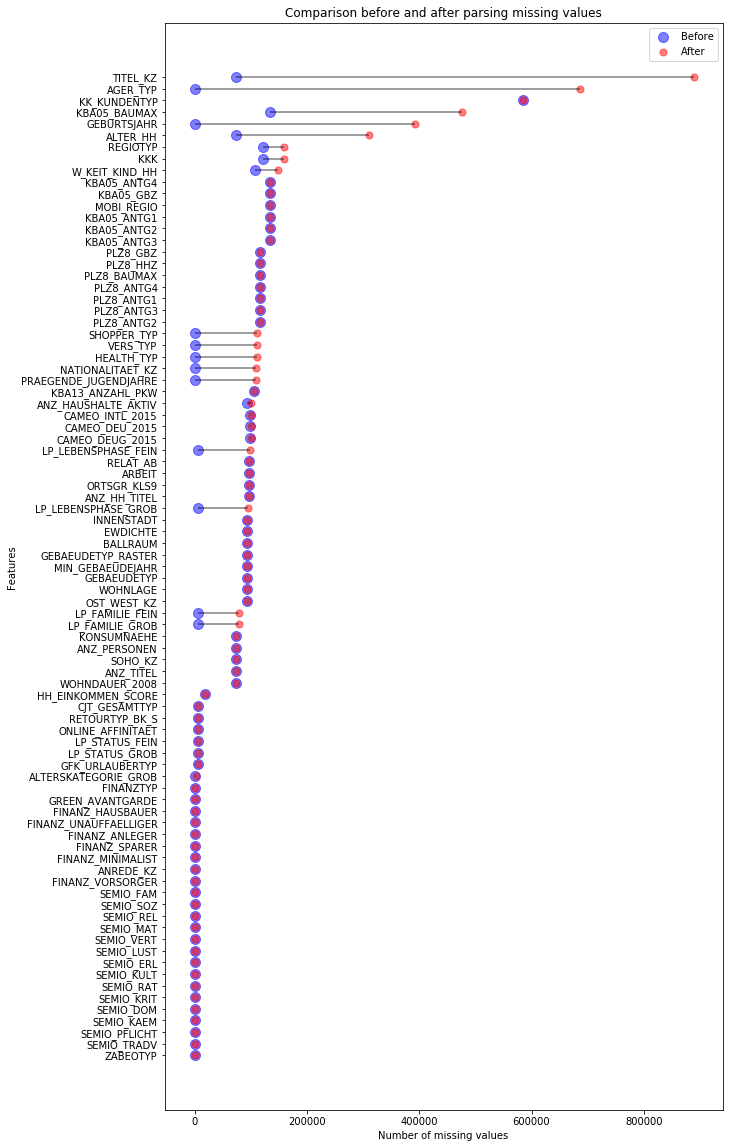

In [16]:
# Dumbell plot comparing missing values
fig = plt.figure(figsize=(10,20))

ordered_df = df_missing_values.sort_values(by='After',ascending=True)
my_range=range(1,len(ordered_df.index)+1)



plt.hlines(y=my_range, xmin=ordered_df['Before'], xmax=ordered_df['After'], color='black', alpha=0.5)
plt.scatter(ordered_df['Before'], my_range, color='blue', alpha=.5, label='Before', s=100)
plt.scatter(ordered_df['After'], my_range, color='red', alpha=.5 , label='After', s=50)
plt.legend()

# Add title and axis names
plt.yticks(my_range, ordered_df.index)
plt.title("Comparison before and after parsing missing values", loc='center')
plt.xlabel('Number of missing values')
plt.ylabel('Features');

**Note:** The dumbell plot clearly shows:
* There are some columbs that miss the same amout of data (e.g SHOPPER_TYP, VERS_TYP, HEALTH_TYP, NATIONALITAET_KZ and PRAEGENDE_JUGENDJAHRE)
* There are 5 columbs with rows that are missiNG over 25 of the data %  (TITEL_KZ, AGER_TYP, KK_KUNDENTYP, KBA05_BAUMAX, GEBURTSJAHR and ALTER_HH)  

#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [17]:
# Perform an assessment of how much missing data there is in each column of the
# dataset

# The fraction of mising data has alredy been stored in df_missing_values
df_missing_values['Missing_Per_Parsed'].head()

AGER_TYP                0.769554
ALTERSKATEGORIE_GROB    0.003233
ANREDE_KZ               0.000000
CJT_GESAMTTYP           0.005446
FINANZ_MINIMALIST       0.000000
Name: Missing_Per_Parsed, dtype: float64

In [18]:
# Fraction of data less than n
n=0.35
df_missing_values['Missing_Per_Parsed'][df_missing_values['Missing_Per_Parsed']<n].count()

80

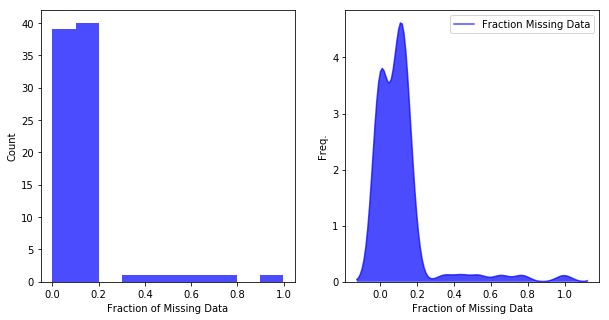

In [19]:
# Compare distribution of the missing data
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax0, ax1 = axes.flatten()

ax0.hist(df_missing_values['Missing_Per_Parsed'], bins = 10,histtype='bar', stacked=True, color="b", alpha=.7)
ax1=sns.kdeplot(df_missing_values['Missing_Per_Parsed'], shade=True, color="b", alpha=.7,label='Fraction Missing Data')

ax0.set_ylabel('Count')
ax1.set_ylabel('Freq.')
ax0.set_xlabel('Fraction of Missing Data')
ax1.set_xlabel('Fraction of Missing Data');



As seen above the distribution is skewed with 79/85 columns are only missing less than 20 % of the of the data in the columns

### Prepare data
Columns mising over 35% of the  data will be removed which meas we will drop 6 % of the coloums


In [20]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

# The colums greater than n will be dropped
n=0.35
dropCol=df_missing_values['Missing_Per_Parsed'][df_missing_values['Missing_Per_Parsed']>n].index
dropCol

Index(['AGER_TYP', 'GEBURTSJAHR', 'TITEL_KZ', 'KK_KUNDENTYP', 'KBA05_BAUMAX'], dtype='object')

In [21]:
azdias_parsed.drop(dropCol, axis = 1, inplace = True)
azdias_parsed.describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,888340.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,780025.000000,793589.000000,796649.000000,813429.000000,813429.000000,886367.000000,886367.000000,782906.000000,783057.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,780025.000000,817722.000000,780025.000000,891221.000000,580954.000000,817722.000000,817722.000000,872873.000000,743233.000000,817722.000000,791610.000000,794213.000000,798073.000000,817252.000000,798073.000000,798073.000000,757897.000000,757897.000000,757897.000000,757897.000000,757897.000000,797481.000000,797481.000000,797481.000000,798066.000000,733157.000000,757897.000000,886367.000000,733157.000000,785421.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,793846.000000,793947.000000,793846.000000
mean,2.757217,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,3.790586,7.350304,0.196612,2.190129,16.332161,4.955185,3.922339,2.381976,4.791151,2.432575,1.168889,9.280709,3.419630,3.945860,4.272729,4.240609,4.001597,4.023709,4.359086,4.481405,4.025014,3.910139,4.763223,4.667550,4.445007,4.256076,3.661784,1.590134,0.008423,1.511166,3.362438,15.291805,1.727637,0.004162,4.207243,4.147141,7.908791,8.354924,0.040647,2.798641,3.018452,1993.277011,4.052836,1.494277,1.265584,0.624525,0.305927,3.158580,4.153043,3.939172,4.549491,3.738306,2.723384,2.963540,2.698691,4.472086,619.701439,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.166686,5.293389,3.071033
std,1.009951,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,1.987876,3.525723,0.397437,0.755213,12.242378,3.748974,3.941285,1.701527,3.425305,1.474315,0.475075,4.032107,1.417741,1.946564,1.915885,2.007373,1.857540,2.077746,2.022829,1.807552,1.903816,1.580306,1.830789,1.795712,1.852412,1.770137,1.707637,1.027972,0.091392,0.499876,1.352704,3.800536,1.155849,0.068855,1.624057,1.784211,1.923137,15.673731,0.324028,2.656713,1.550312,3.332739,1.949539,1.403961,1.245178,1.013443,0.638725,1.329537,2.183710,1.718996,2.028919,0.923193,0.979867,1.428882,1.521524,1.836357,340.034318,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,0.999072,2.303379,1.360532
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1985.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [22]:
# Upare dropped headings in feat_info
for col in dropCol:
    feat_info['Dropped'] [feat_info['attribute'] == col]='yes'


In [23]:
df_missing_values['Missing_Per_Parsed'].count()

85

#### Discussion 1.1.2: Assess Missing Data in Each Column

* There are some columbs that miss the same amout of data (e.g SHOPPER_TYP, VERS_TYP, HEALTH_TYP, NATIONALITAET_KZ and PRAEGENDE_JUGENDJAHRE)
* There are 5 columbs with rows that are missing over 35 of the data %  (TITEL_KZ, AGER_TYP, KK_KUNDENTYP, KBA05_BAUMAX, GEBURTSJAHR and ALTER_HH). These columbs were dropped and accounted for 6% (5/85) of the coloumns that were removed. Thes colums tend to be personal data such as is elderly (AGER_TYP) and year of birth (GEBURTSJAHR)

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [24]:
# How much data is missing in each row of the dataset?
# Finding the percentage of missing values for each row using the mean
azdias_parsed['Missing_num'] = azdias.isnull().mean(axis=1)*100

In [25]:
azdias_parsed['Missing_num'].sort_values(ascending=True).head()

445610    0.0
268531    0.0
268530    0.0
650848    0.0
268528    0.0
Name: Missing_num, dtype: float64

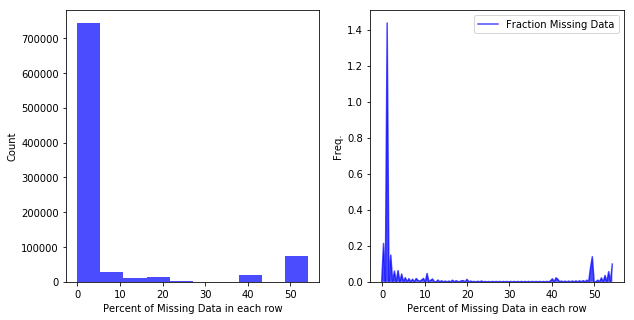

In [26]:
# Plot distribution of missing data in the rows
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,5))
ax0, ax1 = axes.flatten()

ax0.hist(azdias_parsed['Missing_num'], bins = 10,histtype='bar', stacked=True, color="b", alpha=.7)
ax1=sns.kdeplot(azdias_parsed['Missing_num'], shade=True, color="b", alpha=.7,label='Fraction Missing Data')

ax0.set_ylabel('Count')
ax1.set_ylabel('Freq.')
ax0.set_xlabel('Percent of Missing Data in each row')
ax1.set_xlabel('Percent of Missing Data in each row');

In [27]:
# Fraction of data less than n
n=5
azdias_parsed['Missing_num'][azdias_parsed['Missing_num']<=n].count()/azdias_parsed['Missing_num'].count()*100

83.42689411492772

29.5% of the parsed data has values in all rows. 83.4 % of the parsed data data oly mis 5 % of data in the rows. Hence this will be the cut off.


In [28]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

# Drop the helper feature
# azdias_parsed.drop('Missing_num', axis = 1, inplace = True)

azdias_parsed_5 = azdias_parsed[azdias_parsed['Missing_num'] > 5]

In [29]:
azdias_parsed[azdias_parsed['Missing_num'] > 50].describe()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Missing_num
count,100.000000,100.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0,100.0,97.000000,0.0,0.0,0.0,0.0,0.0,0.0,97.000000,70.000000,0.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,97.000000,100.0,97.000000,100.000000,75.000000,100.00,100.0,0.0,33.000000,100.000000,0.0,0.0,0.0,99.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000
mean,2.780000,1.460000,NaN,4.170000,2.490000,3.770000,3.270000,3.560000,1.860000,2.780000,NaN,0.0,1.804124,NaN,NaN,NaN,NaN,NaN,NaN,1.113402,9.300000,NaN,3.540000,4.390000,3.820000,4.870000,5.350000,3.130000,4.160000,3.660000,4.100000,4.600000,4.020000,4.520000,4.330000,3.500000,1.979381,0.0,1.206186,4.260000,16.120000,2.35,0.0,NaN,1.878788,8.010000,NaN,NaN,NaN,2.939394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.388235
std,1.040396,0.500908,NaN,1.035287,1.396207,1.221483,1.347313,1.094707,0.921352,1.202523,NaN,0.0,0.686767,NaN,NaN,NaN,NaN,NaN,NaN,0.405079,3.975833,NaN,1.666182,2.399053,1.919491,1.649334,1.971386,1.574128,1.889471,2.080307,1.480513,2.490386,1.880146,1.966795,0.472582,1.850471,1.020410,0.0,0.406667,1.268261,3.456134,1.50,0.0,NaN,0.599874,1.806246,NaN,NaN,NaN,1.544035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.613367
min,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.0,1.000000,2.000000,6.000000,1.00,0.0,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.764706
25%,2.000000,1.000000,NaN,4.000000,1.000000,3.000000,2.000000,3.000000,1.000000,2.000000,NaN,0.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.000000,NaN,2.000000,1.000000,2.000000,4.000000,4.000000,2.000000,3.000000,1.000000,4.000000,3.000000,2.000000,3.000000,4.000000,1.000000,1.000000,0.0,1.000000,3.000000,14.000000,1.00,0.0,NaN,2.000000,8.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.764706
50%,3.000000,1.000000,NaN,4.500000,2.000000,4.000000,3.500000,3.000000,2.000000,3.000000,NaN,0.0,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.000000,NaN,3.000000,6.000000,4.000000,5.000000,7.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,2.000000,0.0,1.000000,4.000000,16.000000,2.00,0.0,NaN,2.000000,9.000000,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.941176
75%,4.000000,2.000000,NaN,5.00000

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


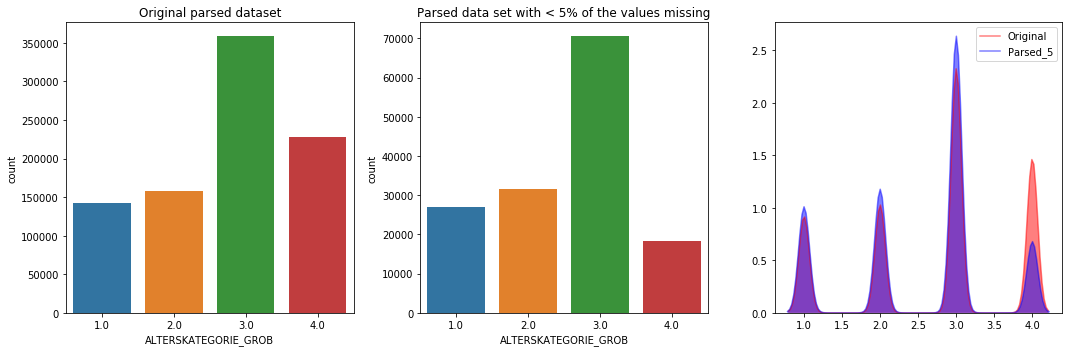

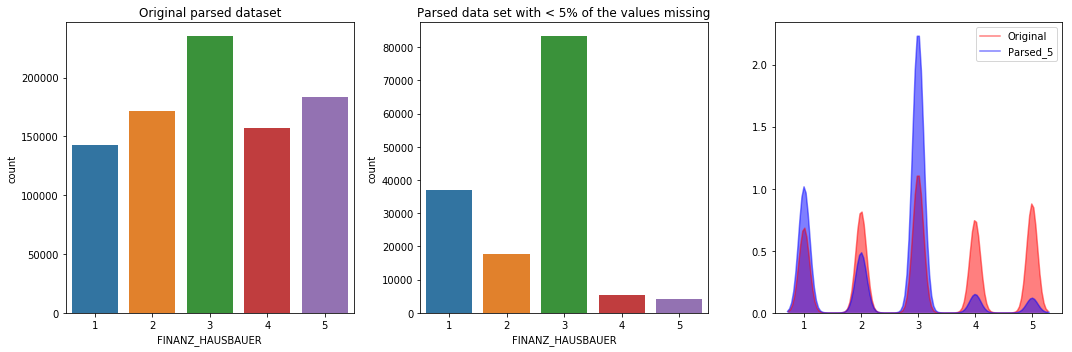

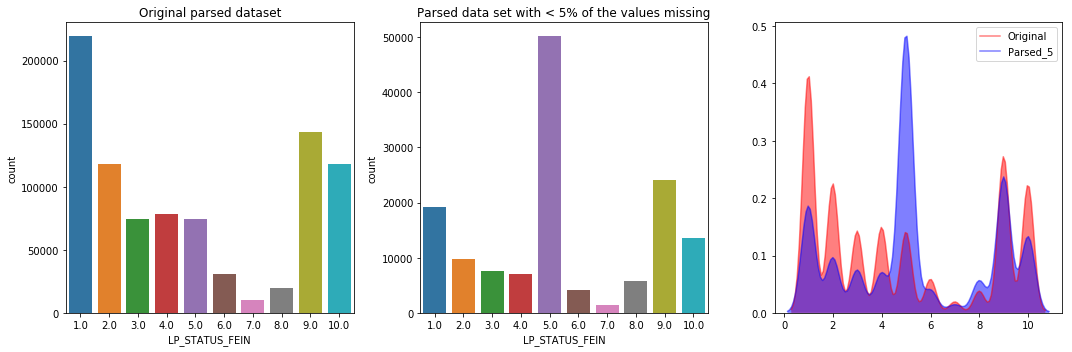

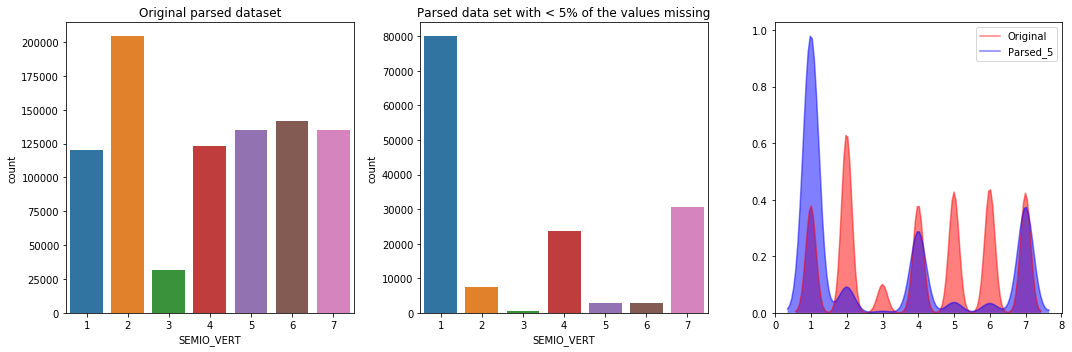

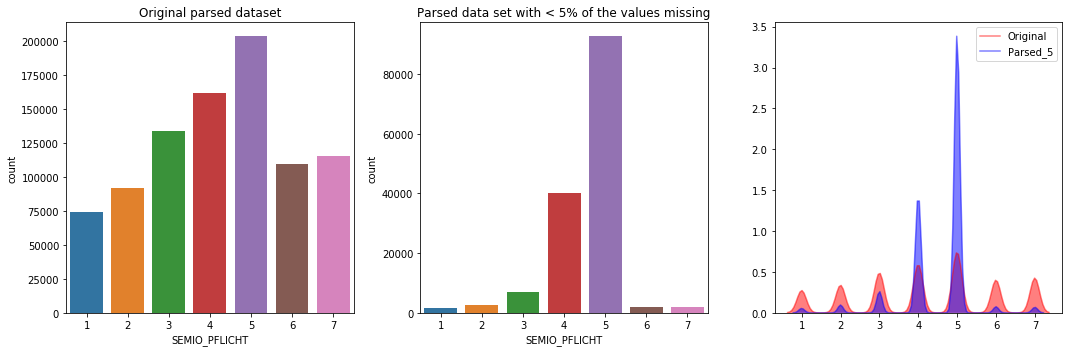

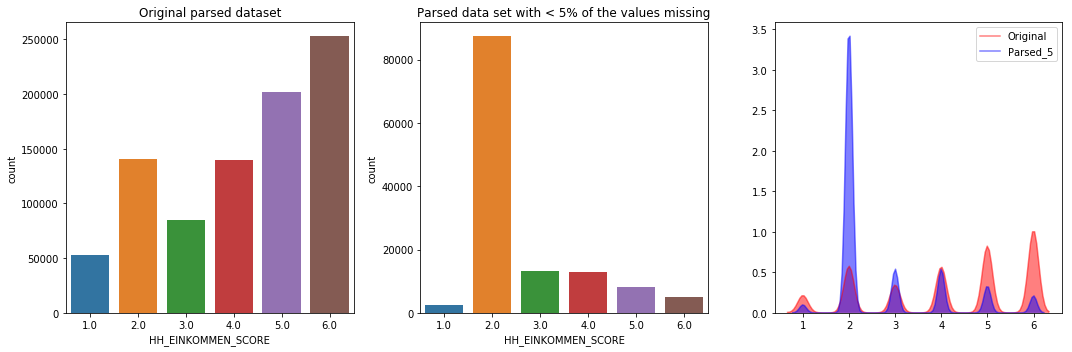

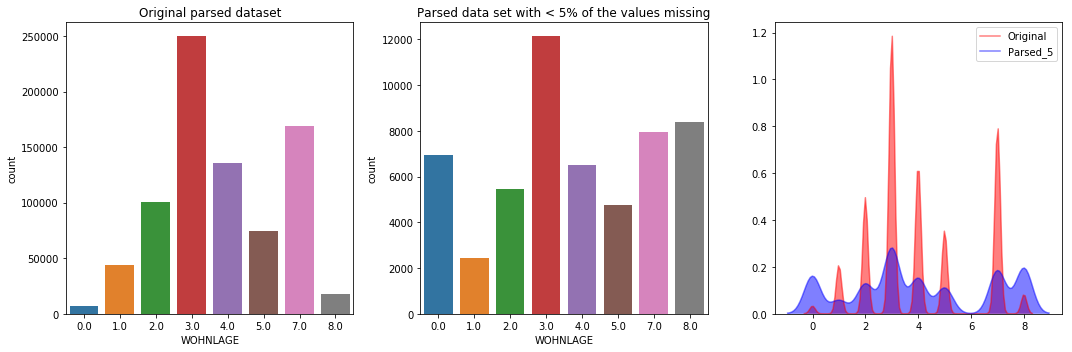

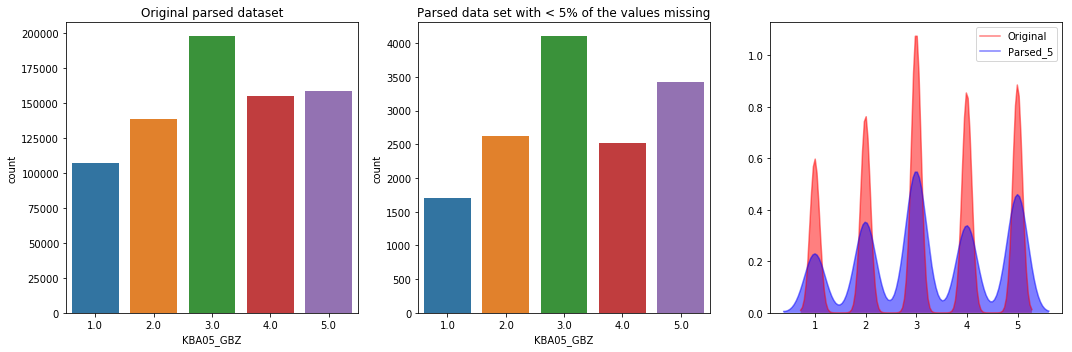

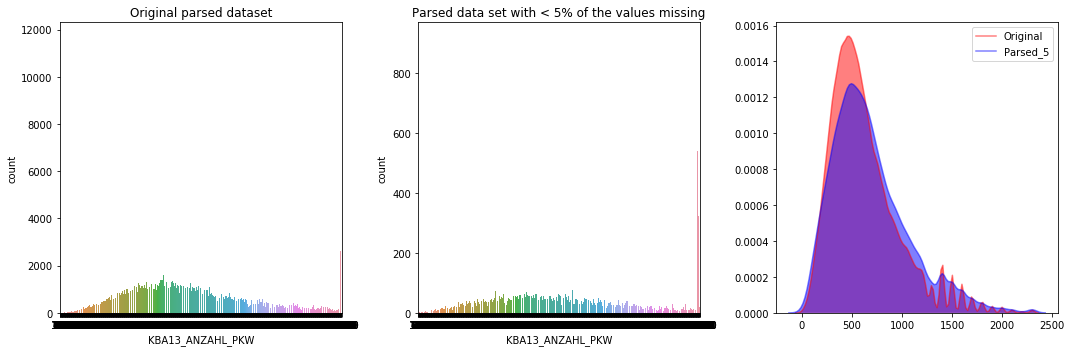

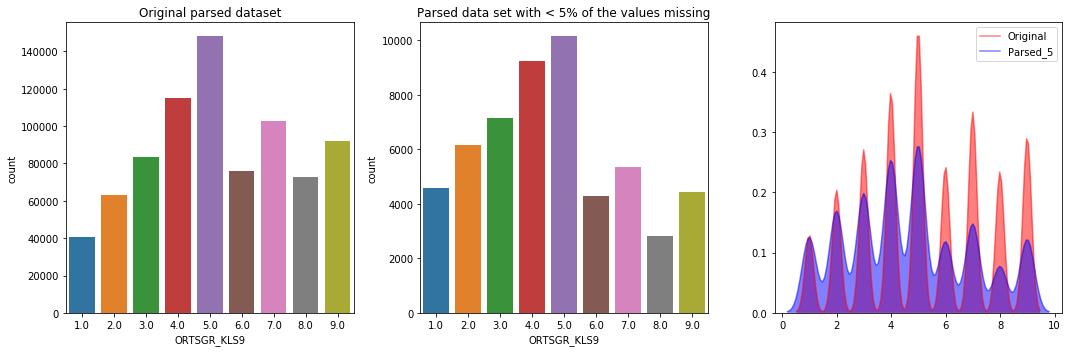

In [30]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def compareDist(column_name, data1,data2):
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    ax = sns.countplot(x = column_name, data=data1)
    plt.title("Original parsed dataset")
    plt.subplot(132)
    ax = sns.countplot(x = column_name, data=data2)
    plt.title("Parsed data set with < 5% of the values missing")
    plt.subplot(133)
    ax=sns.kdeplot(data1[column_name], shade=True, color="r", label="Original", alpha=.5)
    ax=sns.kdeplot(data2[column_name], shade=True, color="b", label="Parsed_5", alpha=.5)
    plt.tight_layout()

idL=np.linspace(0, 78, num=10)
for i in range(10):
    
    compareDist(azdias_parsed.columns[int(idL[i])],azdias_parsed,azdias_parsed_5)

#### Discussion 1.1.3: Assess Missing Data in Each Row

In general 29.5% of the parsed data has values in all rows. Also 83.4 % of the parsed data data only had 5 % of data missing in the rows. 

It can be seen that the distribution for an important feature like CAMEO_DEUG_2015 ( Wealth / Life Stage Typology) shifts the main mode from working class (8) to established middleclass (3). This could have some bearing on the grouping later on. 

However, in general, the distributions keep the same shape but the frequncy of some of the features tend to be different.

### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [31]:
# How many features are there of each data type?

feat_info.type.value_counts()

ordinal        49
categorical    21
numeric         7
mixed           7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

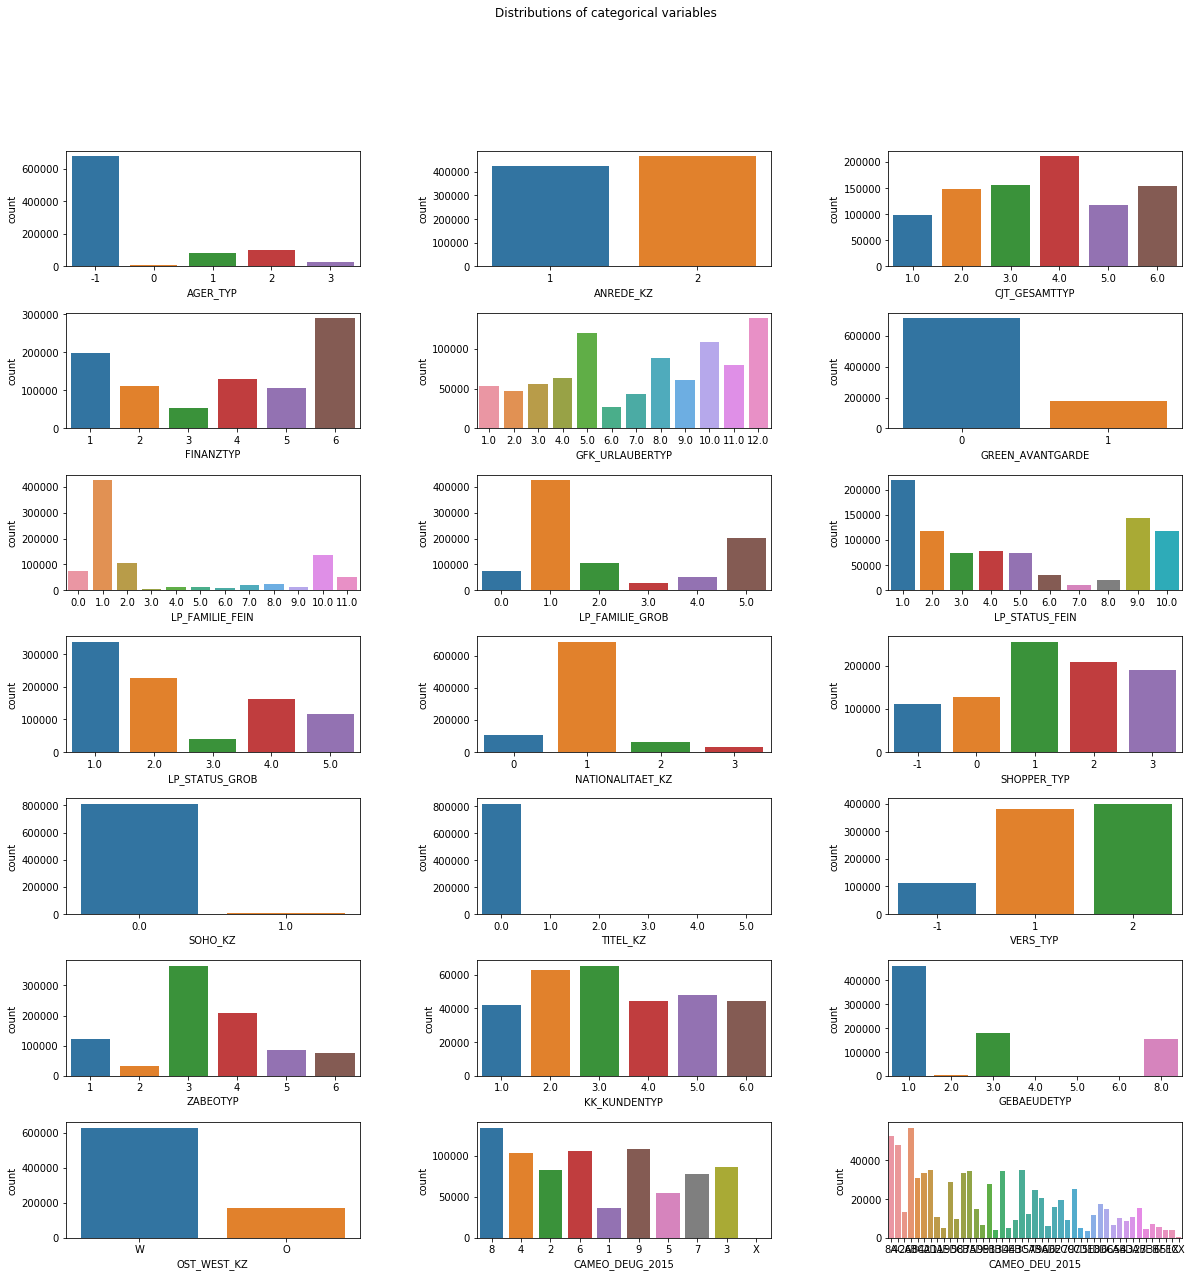

In [32]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?

# Visual representation
fig, axes = plt.subplots(nrows=7, ncols=3,figsize=(20, 20))
fig.subplots_adjust(hspace=0.4,wspace = 0.4)
fig.suptitle('Distributions of categorical variables')
data=feat_info[feat_info['type'] == 'categorical']['attribute']
for ax, attribute in zip(axes.flatten(), feat_info[feat_info['type'] == 'categorical']['attribute']):
    
    sns.countplot(azdias[attribute],ax=ax)

In [33]:
# categorical_column
categorical_columns = feat_info[feat_info['type'] == 'categorical']['attribute']
categorical_columns.count()


21

In [34]:
# Get Binary categorical_column
binary_columns = []
for col in categorical_columns:
    value_count = azdias[col].value_counts()
    if len(value_count) ==2:
        binary_columns.append(col)
        
print(binary_columns)    

['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'OST_WEST_KZ']


In [35]:
# Encode binary columns  that need encoding
binary_encode = []        
      
for col in binary_columns:
    if azdias[col].dtypes == object:
        binary_encode.append(col)
print(binary_encode)        

['OST_WEST_KZ']


In [36]:
#azdias_parsed_5 = azdias_parsed[azdias_parsed['Missing_num'] > 5]  
#Encode Parsed binary data
recode = {'O': 0, 'W': 1}
for col in binary_encode:
    azdias_parsed_5[col].replace(recode, inplace=True) 
azdias_parsed_5[col].head(10)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0     NaN
11    NaN
12    1.0
13    1.0
14    NaN
15    1.0
17    NaN
20    1.0
23    1.0
24    NaN
Name: OST_WEST_KZ, dtype: float64

In [37]:
# Re-encode categorical variable(s) to be kept in the analysis.
drop_columns = ['LP_STATUS_FEIN', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'LP_FAMILIE_FEIN', 'GEBAEUDETYP']
azdias_parsed_5.drop(drop_columns, axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
# Upare dropped headings in feat_info
for col in drop_columns:
    feat_info['Dropped'] [feat_info['attribute'] == col]='yes'

In [39]:
Encode_Col= feat_info[(feat_info['type'] == 'categorical') & (feat_info['Dropped'] == 'no')]['attribute']


In [40]:
# Remove binary col and encode
for col in binary_columns:
    Encode_Col.drop(Encode_Col[Encode_Col == col].index, inplace=True )

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)


In [41]:
azdias_Encode = pd.get_dummies(azdias_parsed_5, columns = Encode_Col)

In [42]:
azdias_Encode.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,Missing_num,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,VERS_TYP_1.0,VERS_TYP_2.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6
0,2.0,1,3,4,3,5,5,3,0,NaN,15.0,4.0,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.411765,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,2.0,1,3,4,3,5,5,3,0,NaN,NaN,NaN,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.411765,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
12,3.0,1,5,3,4,2,4,1,0,1.0,23.0,6.0,8.0,5.0,3,4,4,6,7,6,4,5,5,5,2,4,4,2,0.0,21.0,2.0,0.0,4.0,6.0,4.0,1.0,0.0,5.0,2005.0,1.0,3.0,43,NaN,NaN,NaN,NaN,NaN,2.0,5.0,4.0,4.0,3.0,NaN,4.0,7.0,1106.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,3.0,6.0,4.0,8.235294,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
13,1.0,2,1,4,3,5,5,2,1,3.0,3.0,1.0,15.0,1.0,2,4,5,4,1,2,4,3,6,7,6,4,5,6,0.0,20.0,1.0,0.0,3.0,6.0,3.0,2.0,0.0,5.0,2009.0,1.0,5.0,33,NaN,NaN,NaN,NaN,NaN,7.0,2.0,8.0,4.0,NaN,NaN,5.0,NaN,486.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,6.0,4.0,10.588235,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
14,3.0,1,3,4,3,5,5,3,0,NaN,NaN,NaN,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.411765,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
# Remove the missing aggregate col
drop_columns = ['Missing_num']
azdias_Encode.drop(drop_columns, axis=1, inplace=True)

#### Discussion 1.2.1: Re-Encode Categorical Features

The Categorical columns are:  
Personal Features
* AGER_TYP (dropped due to high number of missing values)
* ANREDE_KZ: Gender
* CJT_GESAMTTYP: preferred information and buying channels for consumer
* FINANZTYP : financial type for individual
* GFK_URLAUBERTYP: Vacation habits
* GREEN_AVANTGARDE: Membership in environmental sustainability as part of youth
* LP_FAMILIE_FEIN (Family type fine dropped to reduce features when encoding)
* LP_FAMILIE_GROB: Family type rough
* LP_STATUS_FEIN (social status fine dropped to reduce features when encoding)
* LP_STATUS_GROB: social status rough
* NATIONALITAET_KZ
* SHOPPER_TYP
* SOHO_KZ
* TITEL_KZ (dropped due to high numb missing values)
* VERS_TYP
* ZABEOTYP
Household-level features  
* KK_KUNDENTYP
Building-level features  
* GEBAEUDETYP
* OST_WEST_KZ
RR4 micro-cell features  
* CAMEO_DEUG_2015: Wealth / Life Stage Typology, rough scale
* CAMEO_DEU_2015 (Wealth / Life Stage Typology, detailed scale dropped to reduce features wen encoding)

The strategy used is to drop all the detailed columns and only keep the rough features.  
From the plots we can see that most of the rough features have 6 or less categories.  
Hence the col below are dropped:  
* GEBAEUDETYP
* CAMEO_DEUG_2015: Wealth / Life Stage Typology, rough scale
* CAMEO_DEU_2015 (Wealth / Life Stage Typology, detailed scale dropped to reduce features wen encoding)
* LP_FAMILIE_FEIN (Family type fine dropped to reduce features when encoding)
* LP_STATUS_FEIN (social status fine dropped to reduce features when encoding)

The col below breaks the rules but is kept because it’s the only one that gives info on the vacation habits
* GFK_URLAUBERTYP: Vacation habits

The remaining columns are then encoded using one hot encoding with 114 features in total


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [44]:
feat_info[feat_info['type'] == 'mixed']

,attribute,information_level,type,missing_or_unknown,Dropped
15,LP_LEBENSPHASE_FEIN,person,mixed,[0],no
16,LP_LEBENSPHASE_GROB,person,mixed,[0],no
22,PRAEGENDE_JUGENDJAHRE,person,mixed,"[-1,0]",no
56,WOHNLAGE,building,mixed,[-1],no
59,CAMEO_INTL_2015,microcell_rr4,mixed,"[-1,XX]",no
64,KBA05_BAUMAX,microcell_rr3,mixed,"[-1,0]",yes
79,PLZ8_BAUMAX,macrocell_plz8,mixed,"[-1,0]",no


### PRAEGENDE_JUGENDJAHRE
Dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)
- -1: unknown
-  0: unknown
-  1: 40s - war years (Mainstream, E+W)
-  2: 40s - reconstruction years (Avantgarde, E+W)
-  3: 50s - economic miracle (Mainstream, E+W)
-  4: 50s - milk bar / Individualisation (Avantgarde, E+W)
-  5: 60s - economic miracle (Mainstream, E+W)
-  6: 60s - generation 68 / student protestors (Avantgarde, W)
-  7: 60s - opponents to the building of the Wall (Avantgarde, E)
-  8: 70s - family orientation (Mainstream, E+W)
-  9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

This will be split into movment and decade ... East vs West is captured in other features

In [45]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
azdias_Encode['PRAEGENDE_JUGENDJAHRE'].head()

0      NaN
11     NaN
12     8.0
13    15.0
14     NaN
Name: PRAEGENDE_JUGENDJAHRE, dtype: float64

In [46]:
# Create Movement col
# When true flag set as 1
mainstream_val = [1, 3, 5, 8, 10, 12, 14]
azdias_Encode['Movement'] = np.where(azdias_Encode['PRAEGENDE_JUGENDJAHRE'].isin(mainstream_val), 1, 0)
azdias_Encode['Movement'].head()

0     0
11    0
12    1
13    0
14    0
Name: Movement, dtype: int64

In [47]:
# Create Decade col
decade = {'1.0': 1940, '2.0': 1940, '3.0': 1950, '4.0': 1950, '5.0': 1960, 
                  '6.0': 1960, '7.0': 1960, '8.0': 1970, '9.0': 1970, '10.0': 1980, 
                  '11.0': 1980, '12.0': 1980, '13.0': 1980, '14.0': 1990, '15.0': 1990}

azdias_Encode['Decade']=np.nan
for val in decade:
     azdias_Encode['Decade'][azdias_Encode['PRAEGENDE_JUGENDJAHRE']==float(val)]=str(decade[val])
azdias_Encode['Decade'].head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0      NaN
11     NaN
12    1970
13    1990
14     NaN
Name: Decade, dtype: object

###  CAMEO_INTL_2015
German CAMEO: Wealth / Life Stage Typology, mapped to international code
- -1: unknown
- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families &  Mature Couples
- 15: Wealthy Households - Elders In Retirement
- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement
- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement
- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement
- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement
- XX: unknown

Two new col for HouseholdWealth and FamType will be created

In [48]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
# First sting value [0] encodes HouseholdWealth and second string value [1] encodes FamType
azdias_Encode['HouseholdWealth'] = azdias_Encode['CAMEO_INTL_2015'].astype(str).str[0]
azdias_Encode['FamType'] = azdias_Encode['CAMEO_INTL_2015'].astype(str).str[1]

In [49]:
# Convert to int
azdias_Encode['FamType']=pd.to_numeric(azdias_Encode['FamType'],downcast='integer' ,errors='coerce')
azdias_Encode['HouseholdWealth']=pd.to_numeric(azdias_Encode['HouseholdWealth'],downcast='integer' ,errors='coerce')

In [50]:
# Encode the new col
EncodeCol = ['HouseholdWealth', 'FamType', 'Movement', 'Decade']
azdias_Encode = pd.get_dummies(azdias_Encode, columns = EncodeCol)

In [51]:
azdias_Encode.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,WOHNLAGE,CAMEO_INTL_2015,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,VERS_TYP_1.0,VERS_TYP_2.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,HouseholdWealth_1.0,HouseholdWealth_2.0,HouseholdWealth_3.0,HouseholdWealth_4.0,HouseholdWealth_5.0,FamType_1.0,FamType_2.0,FamType_3.0,FamType_4.0,FamType_5.0,Movement_0,Movement_1,Decade_1940,Decade_1950,Decade_1960,Decade_1970,Decade_1980,Decade_1990
0,2.0,1,3,4,3,5,5,3,0,NaN,15.0,4.0,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11,2.0,1,3,4,3,5,5,3,0,NaN,NaN,NaN,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12,3.0,1,5,3,4,2,4,1,0,1.0,23.0,6.0,8.0,5.0,3,4,4,6,7,6,4,5,5,5,2,4,4,2,0.0,21.0,2.0,0.0,4.0,6.0,4.0,1.0,0.0,5.0,2005.0,1.0,3.0,43,NaN,NaN,NaN,NaN,NaN,2.0,5.0,4.0,4.0,3.0,NaN,4.0,7.0,1106.0,3.0,3.0,1.0,0.0,1.0,5.0,5.0,3.0,6.0,4.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
13,1.0,2,1,4,3,5,5,2,1,3.0,3.0,1.0,15.0,1.0,2,4,5,4,1,2,4,3,6,7,6,4,5,6,0.0,20.0,1.0,0.0,3.0,6.0,3.0,2.0,0.0,5.0,2009.0,1.0,5.0,33,NaN,NaN,NaN,NaN,NaN,7.0,2.0,8.0,4.0,NaN,NaN,5.0,NaN,486.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,6.0,4.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
14,3.0,1,3,4,3,5,5,3,0,NaN,NaN,NaN,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [52]:
# All other mixed coloums are droped
drop_columns = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE','PLZ8_BAUMAX']
azdias_Encode.drop(drop_columns, axis=1, inplace=True)

In [53]:
# Upare dropped headings in feat_info
for col in drop_columns:
    feat_info['Dropped'] [feat_info['attribute'] == col]='yes'

#### Discussion 1.2.2: Engineer Mixed-Type Features
In this step, PRAEGENDE_JUGENDJAHRE was split into movement and decade ... East vs West is captured in other features.

The second feature CAMEO_INTL_2015 was split into HouseholdWealth and FamType.

The rest of the features are dropped to simplify the problem

LP_LEBENSPHASE_FEIN and LP_LEBENSPHASE_GROB both provide age financial information and is captured elsewhere. PLZ8_BAUMAX provides details of the size of the family home which is captured elsewhere. WOHNLAGE  scores the neighborhood quality but it is dropped given its assumed the features of family wealth will capture this.

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [54]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [55]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

azdias_Encode.head(10)

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SOHO_KZ,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,KONSUMNAEHE,MIN_GEBAEUDEJAHR,OST_WEST_KZ,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB,CJT_GESAMTTYP_1.0,CJT_GESAMTTYP_2.0,CJT_GESAMTTYP_3.0,CJT_GESAMTTYP_4.0,CJT_GESAMTTYP_5.0,CJT_GESAMTTYP_6.0,FINANZTYP_1,FINANZTYP_2,FINANZTYP_3,FINANZTYP_4,FINANZTYP_5,FINANZTYP_6,GFK_URLAUBERTYP_1.0,GFK_URLAUBERTYP_2.0,GFK_URLAUBERTYP_3.0,GFK_URLAUBERTYP_4.0,GFK_URLAUBERTYP_5.0,GFK_URLAUBERTYP_6.0,GFK_URLAUBERTYP_7.0,GFK_URLAUBERTYP_8.0,GFK_URLAUBERTYP_9.0,GFK_URLAUBERTYP_10.0,GFK_URLAUBERTYP_11.0,GFK_URLAUBERTYP_12.0,LP_FAMILIE_GROB_1.0,LP_FAMILIE_GROB_2.0,LP_FAMILIE_GROB_3.0,LP_FAMILIE_GROB_4.0,LP_FAMILIE_GROB_5.0,LP_STATUS_GROB_1.0,LP_STATUS_GROB_2.0,LP_STATUS_GROB_3.0,LP_STATUS_GROB_4.0,LP_STATUS_GROB_5.0,NATIONALITAET_KZ_1.0,NATIONALITAET_KZ_2.0,NATIONALITAET_KZ_3.0,SHOPPER_TYP_0.0,SHOPPER_TYP_1.0,SHOPPER_TYP_2.0,SHOPPER_TYP_3.0,VERS_TYP_1.0,VERS_TYP_2.0,ZABEOTYP_1,ZABEOTYP_2,ZABEOTYP_3,ZABEOTYP_4,ZABEOTYP_5,ZABEOTYP_6,HouseholdWealth_1.0,HouseholdWealth_2.0,HouseholdWealth_3.0,HouseholdWealth_4.0,HouseholdWealth_5.0,FamType_1.0,FamType_2.0,FamType_3.0,FamType_4.0,FamType_5.0,Movement_0,Movement_1,Decade_1940,Decade_1950,Decade_1960,Decade_1970,Decade_1980,Decade_1990
0,2.0,1,3,4,3,5,5,3,0,NaN,5.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11,2.0,1,3,4,3,5,5,3,0,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
12,3.0,1,5,3,4,2,4,1,0,1.0,5.0,3,4,4,6,7,6,4,5,5,5,2,4,4,2,0.0,21.0,2.0,0.0,4.0,6.0,4.0,1.0,0.0,5.0,2005.0,1.0,NaN,NaN,NaN,NaN,NaN,2.0,5.0,4.0,4.0,3.0,NaN,4.0,7.0,1106.0,3.0,3.0,1.0,0.0,5.0,5.0,3.0,6.0,4.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
13,1.0,2,1,4,3,5,5,2,1,3.0,1.0,2,4,5,4,1,2,4,3,6,7,6,4,5,6,0.0,20.0,1.0,0.0,3.0,6.0,3.0,2.0,0.0,5.0,2009.0,1.0,NaN,NaN,NaN,NaN,NaN,7.0,2.0,8.0,4.0,NaN,NaN,5.0,NaN,486.0,2.0,1.0,1.0,1.0,3.0,3.0,3.0,6.0,4.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
14,3.0,1,3,4,3,5,5,3,0,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15,4.0,2,4,1,5,1,1,4,0,2.0,5.0,5,2,2,5,2,7,7,1,3,6,5,6,3,3,0.0,11.0,1.0,0.0,5.0,6.0,4.0,1.0,0.0,1.0,1992.0,1.0,0.0,2.0,2.0,0.0,3.0,1.0,6.0,2.0,3.0,3.0,2.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0
17,2.0,1,3,4,3,5,5,3,0,NaN,3.0,2,6,7,5,1,5,3,3,4,7,6,6,5,3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [56]:
# Convert MIN_GEBAEUDEJAHR which is the first year building was mentioned in the database to int
azdias_Encode['MIN_GEBAEUDEJAHR']=pd.to_numeric(azdias_Encode['MIN_GEBAEUDEJAHR'],downcast='integer' ,errors='coerce')

In [57]:
# Check if any columns are still str
(azdias_Encode.dtypes == object).sum()

0

In [58]:
azdias_Encode.shape

(147703, 127)

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [59]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    # Load in the feature summary file.
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', sep = ';')
    # Added a col to keep track of droed col
    feat_info['Dropped']='no'

    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    azdias_parsed = convert_missing_codes(df, feat_info)
    
    # remove selected columns and rows, ...
    
    # The colums greater than n will be dropped
    df_missing_values = pd.DataFrame(
    {
        
        'After':azdias_parsed.isnull().sum(),
        'Missing_Per_Parsed':azdias_parsed.isnull().mean()
                
    })
    #n=0.35
    #dropCol=df_missing_values['Missing_Per_Parsed'][df_missing_values['Missing_Per_Parsed']>n].index
    dropCol=['TITEL_KZ', 'AGER_TYP', 'GEBURTSJAHR', 'KK_KUNDENTYP', 'KBA05_BAUMAX']
    azdias_parsed.drop(dropCol, axis = 1, inplace = True)
    # Record col that are droped
    for col in dropCol:
        feat_info['Dropped'] [feat_info['attribute'] == col]='yes'
    
    # Finding the percentage of missing values for each row using the mean
    azdias_parsed['Missing_num'] = azdias.isnull().mean(axis=1)*100
    
    # Drop rows mising more than 5% of the data
    azdias_parsed_5 = azdias_parsed[azdias_parsed['Missing_num'] > 5]
    
    
    # select, re-encode, and engineer column values.
    
    categorical_columns = feat_info[feat_info['type'] == 'categorical']['attribute']
    
    # Get Binary categorical_column
    binary_columns = []
    for col in categorical_columns:
        value_count = azdias[col].value_counts()
        if len(value_count) ==2:
            binary_columns.append(col)
    
    # Encode binary columns  that need encoding
    binary_encode = []        
      
    for col in binary_columns:
        if df[col].dtypes == object:
            binary_encode.append(col)
            
    for col in binary_encode:
        azdias_parsed_5[col].replace(recode, inplace=True)
  
    drop_columns = ['LP_STATUS_FEIN', 'CAMEO_DEU_2015', 'CAMEO_DEUG_2015', 'LP_FAMILIE_FEIN', 'GEBAEUDETYP']
    azdias_parsed_5.drop(drop_columns, axis=1, inplace=True)
    
    # Record dropped headings in feat_info
    for col in drop_columns:
        feat_info['Dropped'] [feat_info['attribute'] == col]='yes'
    # Get col to encode    
    Encode_Col= feat_info[(feat_info['type'] == 'categorical') & (feat_info['Dropped'] == 'no')]['attribute']
    
    # Remove binary col and encode
    for col in binary_columns:
        Encode_Col.drop(Encode_Col[Encode_Col == col].index, inplace=True )
    
    azdias_Encode = pd.get_dummies(azdias_parsed_5, columns = Encode_Col)
    
    # Remove the missing aggregate col
    drop_columns = ['Missing_num']
    azdias_Encode.drop(drop_columns, axis=1, inplace=True)
    
    # Create Movement col
    # When true flag as 1
    mainstream_val = [1, 3, 5, 8, 10, 12, 14]
    azdias_Encode['Movement'] = np.where(azdias_Encode['PRAEGENDE_JUGENDJAHRE'].isin(mainstream_val), 1, 0)
    azdias_Encode['Movement'].head()
    # Create Decade col
    decade = {'1.0': 1940, '2.0': 1940, '3.0': 1950, '4.0': 1950, '5.0': 1960, 
                  '6.0': 1960, '7.0': 1960, '8.0': 1970, '9.0': 1970, '10.0': 1980, 
                  '11.0': 1980, '12.0': 1980, '13.0': 1980, '14.0': 1990, '15.0': 1990}

    azdias_Encode['Decade']=np.nan
    for val in decade:
        azdias_Encode['Decade'][azdias_Encode['PRAEGENDE_JUGENDJAHRE']==float(val)]=str(decade[val])
    
    # Investigate "CAMEO_INTL_2015" and engineer two new variables.
    # First sting value [0] encodes HouseholdWealth and second string value [1] encodes FamType
    azdias_Encode['HouseholdWealth'] = azdias_Encode['CAMEO_INTL_2015'].astype(str).str[0]
    azdias_Encode['FamType'] = azdias_Encode['CAMEO_INTL_2015'].astype(str).str[1]
    # Convert to int
    azdias_Encode['FamType']=pd.to_numeric(azdias_Encode['FamType'],downcast='integer' ,errors='coerce')
    azdias_Encode['HouseholdWealth']=pd.to_numeric(azdias_Encode['HouseholdWealth'],downcast='integer' ,errors='coerce')
    # Encode the new col
    EncodeCol = ['HouseholdWealth', 'FamType', 'Movement', 'Decade']
    azdias_Encode = pd.get_dummies(azdias_Encode, columns = EncodeCol)
    
    # All other mixed coloums are droped

    drop_columns = ['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015', 'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'WOHNLAGE','PLZ8_BAUMAX']
    azdias_Encode.drop(drop_columns, axis=1, inplace=True)
    
    # Record dropped headings in feat_info
    for col in drop_columns:
        feat_info['Dropped'] [feat_info['attribute'] == col]='yes'
    
    # Convert MIN_GEBAEUDEJAHR which is the first year building was mentioned in the database to int
    azdias_Encode['MIN_GEBAEUDEJAHR']=pd.to_numeric(azdias_Encode['MIN_GEBAEUDEJAHR'],downcast='integer' ,errors='coerce')
    # Return the cleaned dataframe.
    
    return azdias_Encode

In [60]:
df_clean=clean_data(azdias)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:96: SettingWithCo

In [61]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147703 entries, 0 to 891203
Columns: 127 entries, ALTERSKATEGORIE_GROB to Decade_1990
dtypes: float64(38), int64(22), uint8(67)
memory usage: 78.2 MB


In [62]:
df_clean.shape

(147703, 127)

In [63]:
len(df_clean)

147703

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [64]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.

df_clean.isna().sum()

ALTERSKATEGORIE_GROB        268
ANREDE_KZ                     0
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
GREEN_AVANTGARDE              0
HEALTH_TYP                76614
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
SEMIO_KULT                    0
SEMIO_RAT                     0
SEMIO_KRIT                    0
SEMIO_DOM                     0
SEMIO_KAEM                    0
SEMIO_PFLICHT                 0
SEMIO_TRADV                   0
SOHO_KZ                   73499
ALTER_HH                  94109
ANZ_PERSONEN              73499
ANZ_TITEL                 73499
HH_EINKOMMEN_SCORE        18348
W_KEIT_KIND_HH            92591
WOHNDAUE

In [65]:
# Apply feature scaling to the general population demographics data.

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
imputer = Imputer(missing_values=float("NaN"), strategy="mean", axis=1, copy = False)

# Drop na for fit
#scaler.fit(df_clean.dropna()) 
df_clean[df_clean.columns]=scaler.fit_transform(imputer.fit_transform(df_clean))

In [66]:
df_clean.isna().sum()

ALTERSKATEGORIE_GROB     0
ANREDE_KZ                0
FINANZ_MINIMALIST        0
FINANZ_SPARER            0
FINANZ_VORSORGER         0
FINANZ_ANLEGER           0
FINANZ_UNAUFFAELLIGER    0
FINANZ_HAUSBAUER         0
GREEN_AVANTGARDE         0
HEALTH_TYP               0
RETOURTYP_BK_S           0
SEMIO_SOZ                0
SEMIO_FAM                0
SEMIO_REL                0
SEMIO_MAT                0
SEMIO_VERT               0
SEMIO_LUST               0
SEMIO_ERL                0
SEMIO_KULT               0
SEMIO_RAT                0
SEMIO_KRIT               0
SEMIO_DOM                0
SEMIO_KAEM               0
SEMIO_PFLICHT            0
SEMIO_TRADV              0
SOHO_KZ                  0
ALTER_HH                 0
ANZ_PERSONEN             0
ANZ_TITEL                0
HH_EINKOMMEN_SCORE       0
W_KEIT_KIND_HH           0
WOHNDAUER_2008           0
ANZ_HAUSHALTE_AKTIV      0
ANZ_HH_TITEL             0
KONSUMNAEHE              0
MIN_GEBAEUDEJAHR         0
OST_WEST_KZ              0
K

### Discussion 2.1: Apply Feature Scaling

Imputer was configured to fill NAN's with the mean value in each column and used the standardscalar to remove the mean and scale to unit variance.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [67]:
# Apply PCA to the data.
# Note helperfunctions from the Udacity PCA module was used in the ploting
from importlib import reload 
import helper_functions
reload(helper_functions)

from sklearn.decomposition import PCA

from helper_functions import do_pca, scree_plot, plot_components, pca_results

pca = PCA()
df_pca = pca.fit_transform(df_clean)


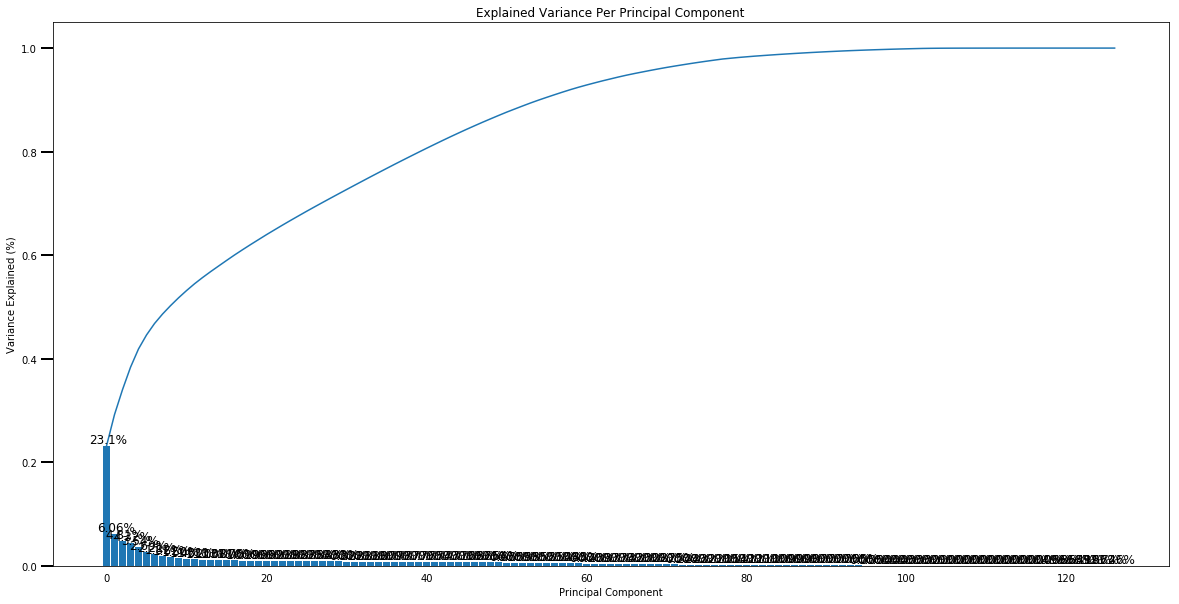

In [68]:
# Investigate the variance accounted for by each principal component.
scree_plot(pca)

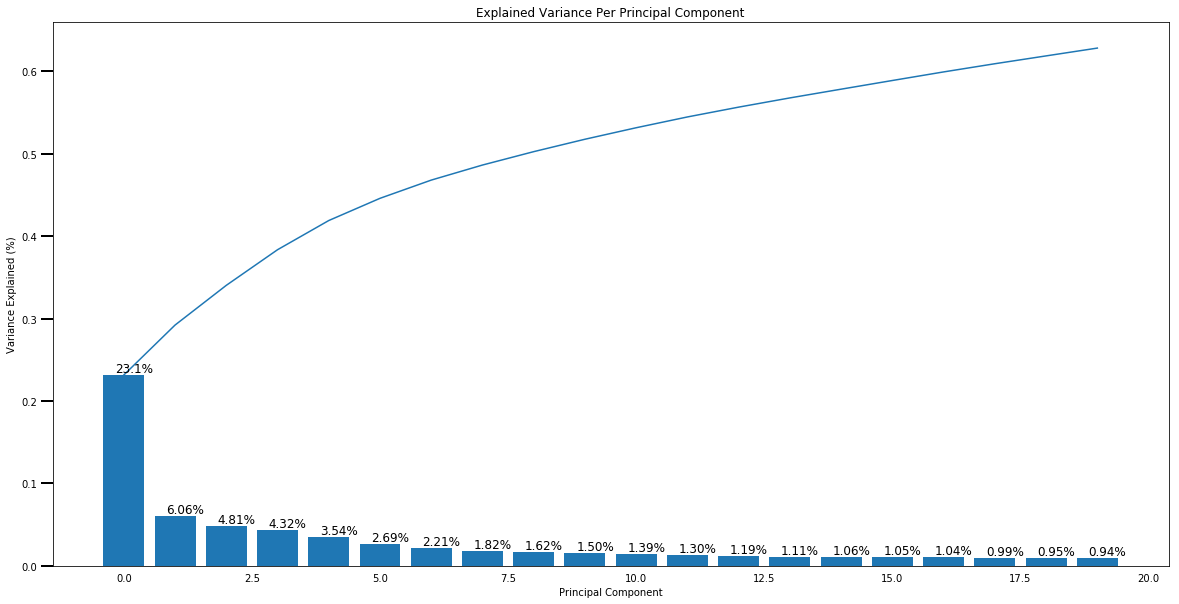

In [69]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca_20 = PCA(20)
df_pca_20 = pca_20.fit_transform(df_clean)
scree_plot(pca_20)

In [70]:

pca_20.explained_variance_ratio_[:5].sum()

0.41887592054757905

In [71]:
pca_20.explained_variance_ratio_[:20].sum()

0.62808879381875105

### Discussion 2.2: Perform Dimensionality Reduction

It can be seen that 42 % of the variance can be explained by the top 5 features and 63 % of the variance can be explaind by the top 20 features.  To  not create to many segments, only the top 20 are kept, since the later 10 featues each add about 1 % variance explained.


### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [72]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def weightsPCA(df,n):
    '''
    df: Datafram used for PCA
    n: The principal component
    '''
    # PCA components
    components = pd.DataFrame(np.round(pca.components_[n - 1: n], 4), columns = df.keys())
    components.index = ['Weights']
    
    components = components.sort_values(by = 'Weights', axis = 1, ascending=False)
    components = components.T
    
    return components

In [73]:
# Sorted weights for the first principal component
res1=weightsPCA(df_clean,1)
[res1.head(10),res1.tail(10)]

[                      Weights
 MIN_GEBAEUDEJAHR       0.1701
 ALTER_HH               0.1624
 GEBAEUDETYP_RASTER     0.1607
 KBA05_GBZ              0.1510
 MOBI_REGIO             0.1502
 NATIONALITAET_KZ_1.0   0.1496
 WOHNDAUER_2008         0.1476
 KBA05_ANTG2            0.1464
 KBA05_ANTG1            0.1464
 KBA05_ANTG3            0.1444,                        Weights
 SEMIO_KAEM             -0.1057
 GFK_URLAUBERTYP_5.0    -0.1136
 FINANZ_UNAUFFAELLIGER  -0.1155
 ZABEOTYP_3             -0.1257
 Movement_0             -0.1300
 SEMIO_REL              -0.1317
 FINANZ_ANLEGER         -0.1337
 FINANZTYP_4            -0.1620
 SOHO_KZ                -0.1678
 ANZ_TITEL              -0.1683]

In [74]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
res2=weightsPCA(df_clean,2)
[res2.head(10),res2.tail(10)]

[                      Weights
 FINANZ_VORSORGER       0.2841
 FINANZTYP_2            0.1999
 SEMIO_ERL              0.1871
 ALTERSKATEGORIE_GROB   0.1789
 FINANZ_MINIMALIST      0.1661
 ZABEOTYP_3             0.1630
 SEMIO_LUST             0.1585
 Decade_1960            0.1307
 Decade_1950            0.1192
 CJT_GESAMTTYP_2.0      0.1044,                        Weights
 SEMIO_FAM              -0.1709
 SEMIO_REL              -0.1729
 FINANZ_ANLEGER         -0.1732
 SEMIO_KULT             -0.1770
 SEMIO_PFLICHT          -0.1771
 SEMIO_RAT              -0.1876
 Decade_1990            -0.2104
 FINANZ_UNAUFFAELLIGER  -0.2274
 SEMIO_TRADV            -0.2544
 FINANZ_SPARER          -0.2625]

In [75]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
res3=weightsPCA(df_clean,3)
[res3.head(10),res3.tail(10)]

[                    Weights
 SEMIO_DOM            0.2469
 SEMIO_KAEM           0.2266
 SEMIO_KRIT           0.2248
 ANREDE_KZ            0.2134
 HH_EINKOMMEN_SCORE   0.1818
 PLZ8_ANTG3           0.1692
 PLZ8_ANTG4           0.1687
 PLZ8_ANTG2           0.1672
 FINANZ_HAUSBAUER     0.1672
 PLZ8_HHZ             0.1643,                    Weights
 ZABEOTYP_1         -0.0789
 FINANZTYP_3        -0.1203
 SEMIO_SOZ          -0.1457
 SHOPPER_TYP_1.0    -0.1527
 SEMIO_MAT          -0.1576
 VERS_TYP_1.0       -0.1585
 SEMIO_FAM          -0.1704
 SEMIO_VERT         -0.2042
 SEMIO_KULT         -0.2203
 FINANZ_MINIMALIST  -0.2376]

### Discussion 2.3: Interpret Principal Components

The first PC paints a picture of someone who is German (NATIONALITAET_KZ_1.0) living in a low to medium density housing area (KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3). When they plan vacations its not of the nature type and their movement during the youth was not due to being avantgarde (Movement_0 ). They are also are not necessarily the type to be financially prepared (FINANZTYP_4).

The second PC paints a picture of someone who is a money saver (FINANZTYP_2) and whose financial preparedness will give more insight (FINANZ_VORSORGER,). They prefer their energy to be fair supplied (ZABEOTYP_3) and their preferred information and buying channels is Advertising- and Consumption traditionalist  (CJT_GESAMTTYP_2). They are not the socially safety driven type (VERS_TYP_1.0) and are not the type to shop stressed (SHOPPER_TYP_1.0)

The third PC is strongly dominated by personality traits (SEMIO_DOM, SEMIO_KAEM, SEMIO_KRIT) and larger family homes  (PLZ8_ANTG3, PLZ8_ANTG4, PLZ8_ANTG2). They don’t necessarily prefer their energy to be green (ZABEOTYP_1) They are not the  socially safety driven type (VERS_TYP_1.0), are not the type to shop stressed (SHOPPER_TYP_1.0) and are not the type to generally invest in homes (FINANZTYP_3)

If I had more time I would have encoded the male and female indicators, age feature, features such as PLZ8 and KBA05, which would give more info on their housing situation along with some of the financial indicators.



## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [76]:
# Over a number of different cluster counts...
# run k-means clustering on the data and...
# compute the average within-cluster distances.


from sklearn.cluster import KMeans
def score(data, k):
    kmeans_k = KMeans(k)
    model_k = kmeans_k.fit(data)
    return abs(model_k.score(data))

In [77]:
scores = []
n=21
centers = range(5, n)
for k in centers:
    print('Fitting  {} clusters'.format(k))
    scores.append(score(df_pca_20, k))    

Fitting  5 clusters
Fitting  6 clusters
Fitting  7 clusters
Fitting  8 clusters
Fitting  9 clusters
Fitting  10 clusters
Fitting  11 clusters
Fitting  12 clusters
Fitting  13 clusters
Fitting  14 clusters
Fitting  15 clusters
Fitting  16 clusters
Fitting  17 clusters
Fitting  18 clusters
Fitting  19 clusters
Fitting  20 clusters


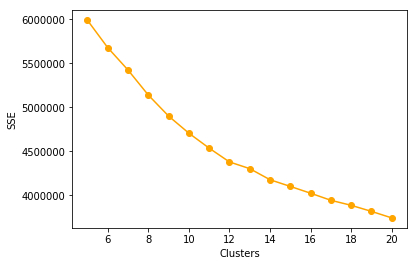

In [78]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(centers, scores, linestyle='-', marker='o', color='orange')
plt.xlabel('Clusters')
plt.ylabel('SSE');

In [79]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
prediction_kmeans_12 = KMeans(n_clusters=12).fit(df_pca_20)


### Discussion 3.1: Apply Clustering to General Population

The aim is to identify the elbow whre adding new clusters will no longer create a substantial decrease in the average distance
The KMeans result for  5 to 20 clusters shows a slight kink for 12 clusters, hence this is what is used for the next step.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [90]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')
customers.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,GEBURTSJAHR,GFK_URLAUBERTYP,GREEN_AVANTGARDE,HEALTH_TYP,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,PRAEGENDE_JUGENDJAHRE,RETOURTYP_BK_S,SEMIO_SOZ,SEMIO_FAM,SEMIO_REL,SEMIO_MAT,SEMIO_VERT,SEMIO_LUST,SEMIO_ERL,SEMIO_KULT,SEMIO_RAT,SEMIO_KRIT,SEMIO_DOM,SEMIO_KAEM,SEMIO_PFLICHT,SEMIO_TRADV,SHOPPER_TYP,SOHO_KZ,TITEL_KZ,VERS_TYP,ZABEOTYP,ALTER_HH,ANZ_PERSONEN,ANZ_TITEL,HH_EINKOMMEN_SCORE,KK_KUNDENTYP,W_KEIT_KIND_HH,WOHNDAUER_2008,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,GEBAEUDETYP,KONSUMNAEHE,MIN_GEBAEUDEJAHR,WOHNLAGE,KBA05_ANTG1,KBA05_ANTG2,KBA05_ANTG3,KBA05_ANTG4,KBA05_BAUMAX,KBA05_GBZ,BALLRAUM,EWDICHTE,INNENSTADT,GEBAEUDETYP_RASTER,KKK,MOBI_REGIO,ONLINE_AFFINITAET,REGIOTYP,KBA13_ANZAHL_PKW,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,191652.000000,191652.000000,191652.000000,188439.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,188439.000000,191652.000000,191652.000000,188439.000000,188439.000000,188439.000000,188439.000000,188439.000000,188439.000000,191652.000000,191652.000000,188439.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,191652.000000,145056.000000,145056.000000,191652.000000,191652.000000,145056.000000,145056.000000,145056.000000,188684.000000,79715.000000,137910.000000,145056.000000,141725.000000,139542.000000,141725.000000,145001.000000,141725.000000,141725.000000,135672.000000,135672.000000,135672.000000,135672.000000,135672.000000,135672.000000,141693.000000,141693.000000,141693.000000,141725.000000,137392.000000,135672.000000,188439.000000,137392.000000,140371.000000,138888.000000,138888.000000,138888.000000,138888.000000,138888.000000,138888.000000,138888.000000,141176.000000,141176.000000,141176.000000
mean,0.344359,3.060907,1.376432,3.677928,3.963773,2.057051,4.183317,2.439808,2.646176,2.781176,4.137958,1003.392733,6.302268,0.367171,1.198396,18.181571,5.422694,4.254448,2.355043,6.687910,3.209251,0.773433,4.248273,3.716311,3.742137,4.414026,4.112788,3.883163,4.185279,5.366477,4.408021,3.682497,3.165879,4.674535,4.483835,4.187246,3.528254,2.919161,0.987754,0.009865,0.021681,0.849008,2.576806,11.352009,2.267828,0.020392,2.942481,3.421803,4.152716,8.646371,4.965863,0.067413,2.369942,3.129978,1993.056659,3.723133,2.207058,1.209004,0.309968,0.153385,1.043826,3.630403,4.301758,3.881702,4.784577,3.852524,2.321569,3.627425,2.764327,3.814341,667.231216,2.537404,2.731510,1.388817,0.539939,1.556607,3.634893,3.622192,2.824850,5.119517,2.898510
std,1.391672,1.086254,0.484492,1.813975,1.036230,1.319422,0.995365,1.697932,1.586506,1.147353,1.503946,974.531081,2.877181,0.482035,1.450937,15.009985,4.717907,4.492807,2.052142,3.090573,1.436958,0.495983,3.807671,1.113933,1.718039,1.733128,2.070958,1.840131,2.367407,1.443103,1.720909,1.573090,1.316221,2.041059,1.631941,1.872047,1.493916,1.219224,1.538679,0.098833,0.210424,1.166162,1.168486,6.275026,1.390620,0.152234,1.533347,1.623890,1.974375,1.154001,14.309694,0.545576,2.434227,1.439740,3.080241,2.095540,1.383509,1.086202,0.765292,0.476992,1.384973,1.168496,2.114614,1.607621,1.961473,0.830285,1.100512,1.282444,1.266050,2.075155,340.481722,0.904927,0.840922,0.885038,0.637048,1.185736,0.933660,1.008472,1.012415,2.159184,1.422683
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00

In [91]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data
df_clean_customers=clean_data(customers)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(obj)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:96: SettingWithCo

In [92]:
df_clean_customers.shape

(31307, 127)

In [93]:
df_clean.columns.difference(df_clean_customers.columns)

Index([], dtype='object')

In [94]:
#obtaining cluster predictions for the
# customer demographics data.
# Impute means
#customers_imputed = imputer.transform(df_clean_customers)
# Standardize
#customers_standard = scaler.transform(customers_imputed)
# Clustered 
#customers_pca = pca_20.transform(customers_standard)
df_clean_customers[df_clean_customers.columns]=scaler.transform(imputer.transform(df_clean_customers))

In [95]:
customers_pca = pca_20.transform(df_clean_customers)
prediction_customers = prediction_kmeans_12.predict(customers_pca)
prediction_pop =prediction_kmeans_12.predict(df_pca_20)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [96]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

# Predict labels for data
azdias_predict = pd.DataFrame(np.array(prediction_pop), columns=['Predictions'])
customer_predict = pd.DataFrame(np.array(prediction_customers), columns=['Predictions'])

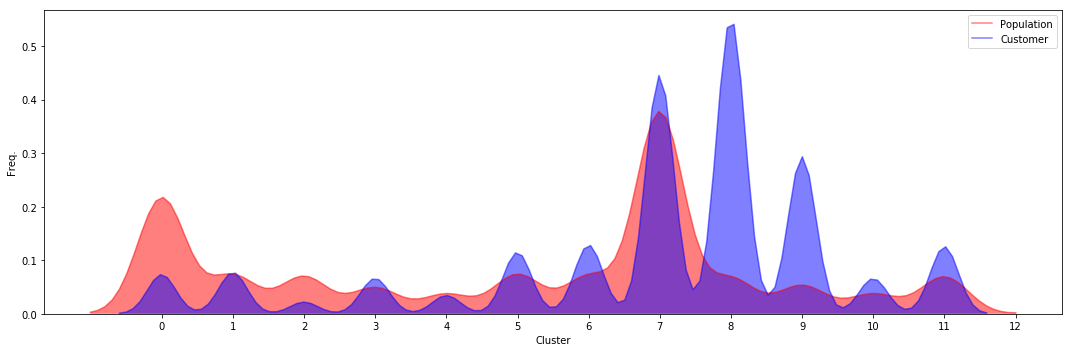

In [97]:
plt.figure(figsize=(15,5))
ax=sns.kdeplot(azdias_predict['Predictions'], shade=True, color="r", label="Population", alpha=.5)
ax=sns.kdeplot(customer_predict['Predictions'], shade=True, color="b", label="Customer", alpha=.5)
plt.xlabel('Cluster')
plt.ylabel('Freq.')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.tight_layout()

In [100]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

target_list = customer_predict[customer_predict['Predictions'] == 8].index
df_target = df_clean_customers.iloc[target_list]
[df_target.mean().sort_values(ascending=False).head(5),df_target.mean().sort_values(ascending=False).tail(5)]

[FINANZ_VORSORGER        0.765181
 FINANZTYP_2             0.664462
 SEMIO_ERL               0.650054
 ALTERSKATEGORIE_GROB    0.624073
 SHOPPER_TYP_3.0         0.600624
 dtype: float64, SEMIO_FAM        -0.658489
 FINANZ_ANLEGER   -0.676870
 SEMIO_PFLICHT    -0.689945
 FINANZ_SPARER    -0.761977
 SEMIO_REL        -0.803248
 dtype: float64]

In [101]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

target_list = customer_predict[customer_predict['Predictions'] == 0].index
df_target = df_clean_customers.iloc[target_list]
[df_target.mean().sort_values(ascending=False).head(5),df_target.mean().sort_values(ascending=False).tail(5)]

[ANZ_TITEL         1.240275
 SOHO_KZ           1.193398
 FINANZTYP_4       1.147360
 SEMIO_REL         1.101934
 FINANZ_ANLEGER    0.991589
 dtype: float64, SEMIO_VERT             -1.025471
 MIN_GEBAEUDEJAHR       -1.106424
 WOHNDAUER_2008         -1.121542
 ALTERSKATEGORIE_GROB   -1.149026
 NATIONALITAET_KZ_1.0   -1.307926
 dtype: float64]

### Discussion 3.3: Compare Customer Data to Demographics Data

Cluster 8 is overrepresented in the customer data compared to the general population. These are persons who can be targeted  are money savers (FINANZTYP_2) and are demanding shoppers (SHOPPER_TYP_3.0). These are people the company should target.

Cluster 7 is underrepresented in the customer data compared to the general population. persons who are financial type is "be prepared" (FINANZTYP_4) are poor targets along with non-Germans (NATIONALITAET_KZ_1.0 is germans but is -ve). 

The lack of encoding of the other features like (FINANZ_VORSORGER,SEMIO_ERL,ALTERSKATEGORIE_GROB and ANZ_TITEL ) makes it difficult to drew further  inferences on the type of persons that the company should target.

As stated in the PC section, if I had more time I would have encoded more gender/title, age, housing, personality and financial features.


> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.